In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [66]:
df=pd.read_csv('product a.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [67]:
sales_a= df.drop(['Product Name','Product Category'],axis=1)

In [68]:
sales_a.shape

(60, 1)

In [69]:
sales_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [70]:
sales_a['Sales'].sum()

3213992

Text(0.5, 1.0, 'Product A')

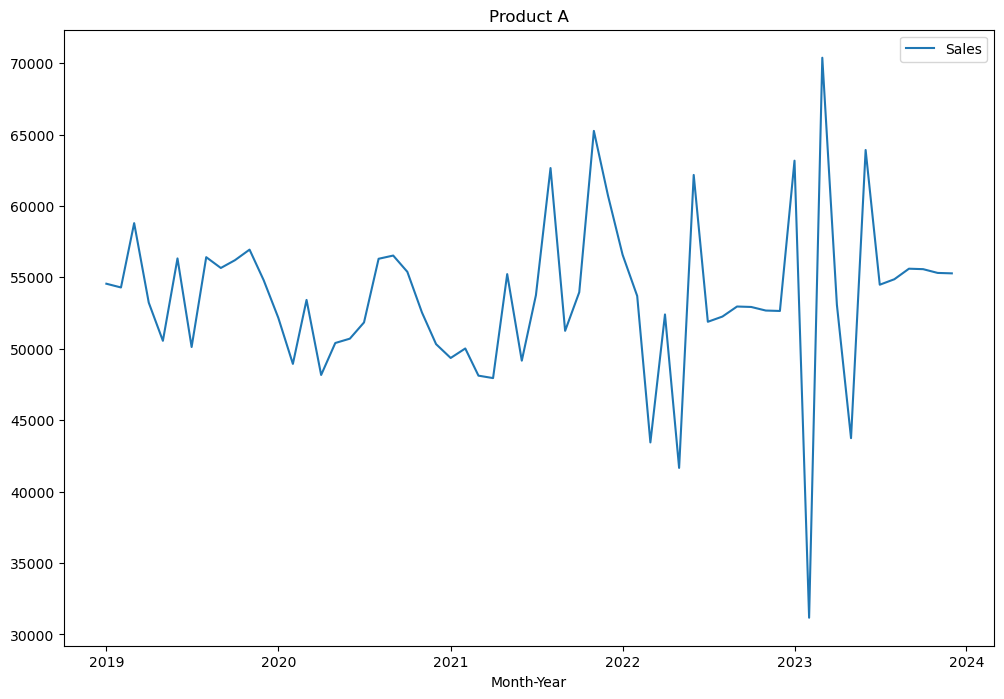

In [71]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_a)
plt.title('Product A')

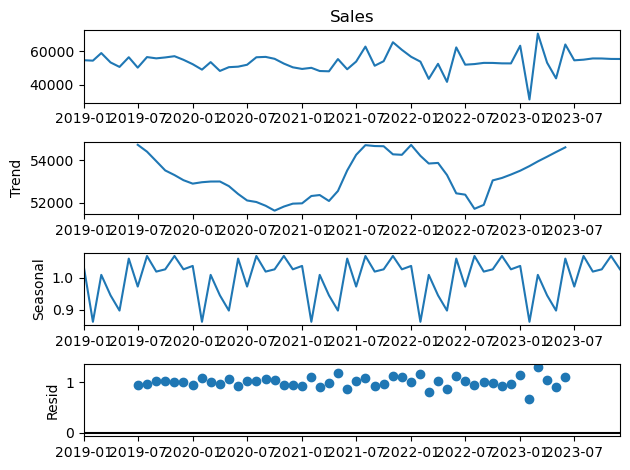

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_a['Sales'], model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()

In [73]:
train= sales_a[:54]
test=sales_a[54:]

In [74]:
len(train)

54

In [75]:
model=ExponentialSmoothing(train['Sales'],trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:
pred=model.forecast(6)

In [77]:
pred

2023-07-01    52261.155561
2023-08-01    58883.939994
2023-09-01    55222.900172
2023-10-01    56244.811809
2023-11-01    59536.512147
2023-12-01    56709.583591
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product A')

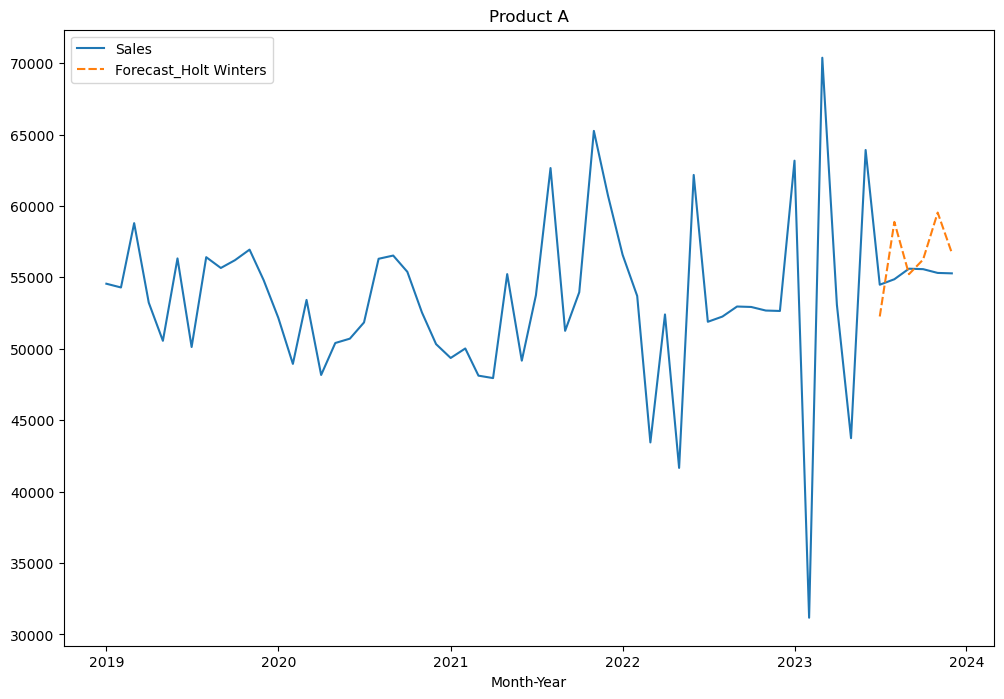

In [78]:
sales_a['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12, 8))
sns.lineplot(sales_a[['Sales','Forecast_Holt Winters']])
plt.title('Product A')

In [79]:
mae= mean_absolute_error(test['Sales'],pred)
mse=mean_squared_error(test['Sales'], pred)
mape= mean_absolute_percentage_error(test['Sales'],pred)
rmse= np.sqrt(mean_squared_error(test['Sales'], pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 2157.7986346409016
MAPE - Holt Winters: 0.03919773941067741
MSE - Holt Winters: 6926201.959835219
RMSE - Holt Winters: 2631.7678392736734


In [80]:
sales_a.tail(12)

,Sales,Forecast_Holt Winters
Month-Year,,
2023-01-01,63171,NaN
2023-02-01,31168,NaN
2023-03-01,70380,NaN
2023-04-01,53078,NaN
2023-05-01,43741,NaN
2023-06-01,63919,NaN
2023-07-01,54485,52261.155561
2023-08-01,54869,58883.939994
2023-09-01,55607,55222.900172


# FORECASTING

In [81]:
model_forecast=ExponentialSmoothing(sales_a['Sales'],trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [82]:
forecast_=model_forecast.forecast(6)

In [83]:
forecast_

2024-01-01    56184.533209
2024-02-01    46858.292147
2024-03-01    54823.650483
2024-04-01    51454.611189
2024-05-01    48902.756902
2024-06-01    57714.562171
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product A')

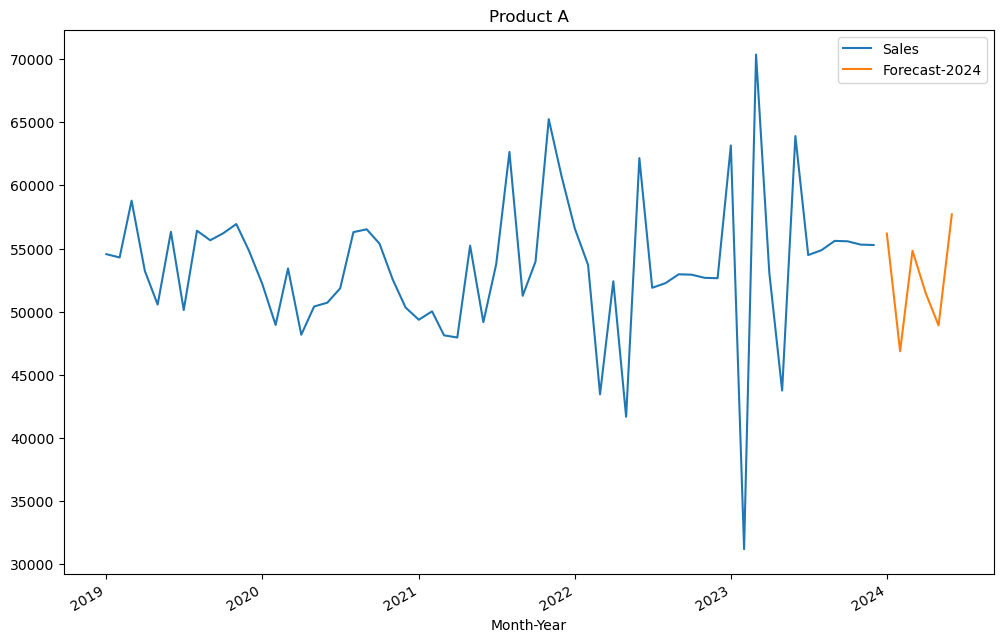

In [84]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_a[['Sales']])
forecast_.plot(legend=True, label='Forecast-2024')
plt.title('Product A')